<h1>Auto Encoder Ciphar</h1>
<h6>Saket Tiwari</h6>
Date: 04 July 2019

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import keras
from keras.datasets import cifar10

In [0]:
(x_train , _), (x_test , _)= cifar10.load_data()

In [0]:
#Why are we converting training model to float32 ?

x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255

In [40]:
print(x_train.shape , x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [0]:
#We are reshaping here to to vectorize our dataset
x_train= x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

In [0]:
#Including random noise

noise_factor=0.5
x_train_noisy= x_train + noise_factor* np.random.normal( loc= 0.0 , scale= 1.0 , size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal ( loc=0.0 , scale = 1.0, size = x_test.shape)

W0702 22:44:27.692237 140592199223168 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 22:44:27.711351 140592199223168 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 22:44:27.731532 140592199223168 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 22:44:27.751751 140592199223168 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 22:44:27.771745 140592199223168 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 22:44:27.790373 140592199223168 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 22:44:27.813826 140592

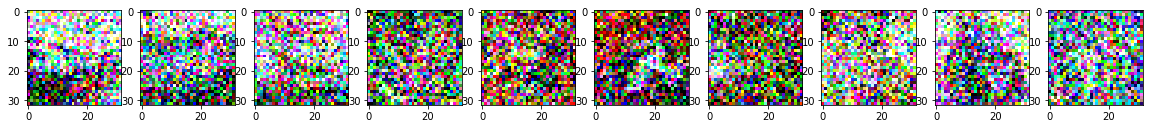

In [43]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax= plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(32,32,3))
plt.show()

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [0]:
#Encoding

input_img= Input( shape=(32,32,3))
x=Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x=MaxPooling2D((2,2), padding='same')(x)

x=Conv2D(32,(3,3), activation= 'relu', padding = 'same')(x)
encoded= MaxPooling2D((2,2), padding='same')(x)


#Decoding
x=Conv2D(32,(3,3), activation= 'relu', padding= 'same')(x)
x=UpSampling2D((2,2))(x)

decoded= Conv2D(3,(3,3) , activation='sigmoid', padding= 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer= 'adadelta', loss='binary_crossentropy')

In [68]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 3)         867       
Total para

In [0]:
autoencoder.fit(x_train_noisy , x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy,x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 207us/step - loss: 0.5988 - val_loss: 0.5868
Epoch 2/10
24064/50000 [=============>................] - ETA: 4s - loss: 0.5839

In [0]:
pred=autoencoder.predict(x_test_noisy)

In [0]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i])
plt.show()    

plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i])
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i])  
plt.show()
